In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import R, zero_Celsius
from oetils import init_plotting

In [2]:
W = init_plotting(latex=True, sans=True)

In [3]:
gam = 1.40  # Heat capacity ratio of gas
data = pd.DataFrame({
    'T': [-20.0, 0.0, 20.0, 40.0, 60.0, 80.0],  # Gas temperature [°C]
    'v': [324., 337., 349., 361., 372., 383.],  # Speed of sound [m / s]
})

# Convert to SI
data['T'] += zero_Celsius
data

,T,v
0,253.15,324.0
1,273.15,337.0
2,293.15,349.0
3,313.15,361.0
4,333.15,372.0
5,353.15,383.0


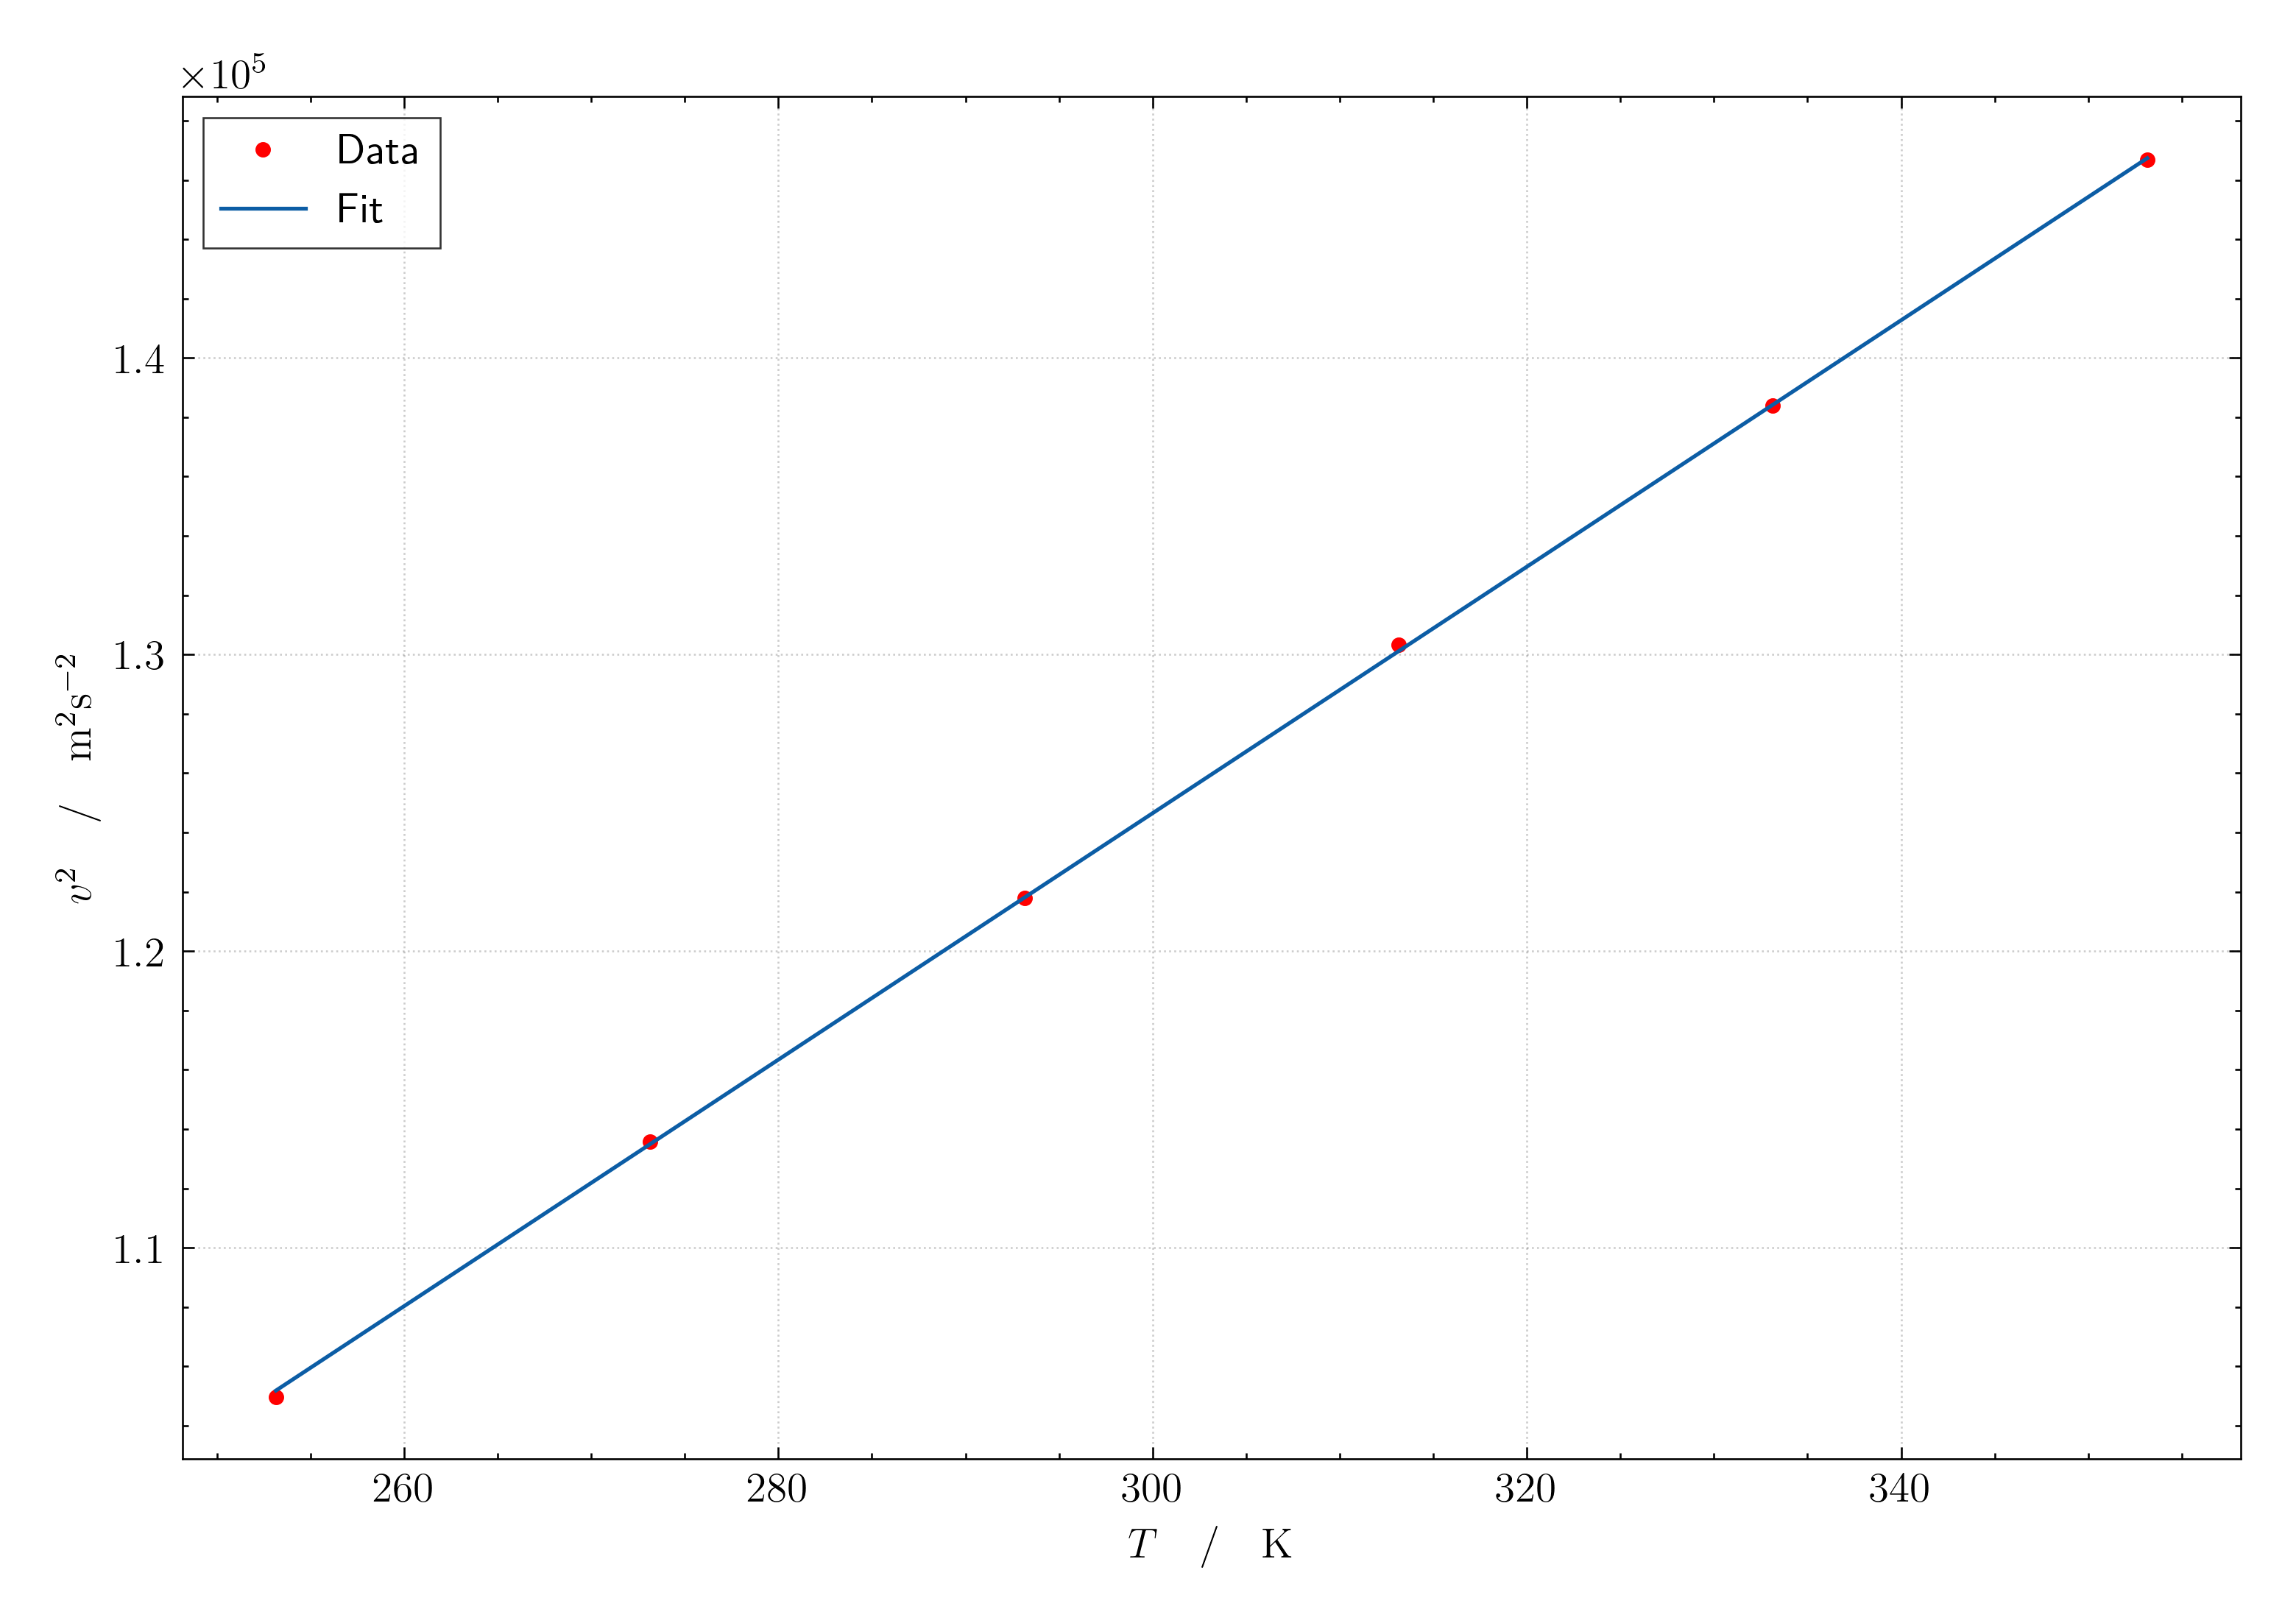

In [4]:
# Least squares fit
x = data['T'].values[:, None]
y = data.v**2
w = np.linalg.lstsq(x, y, rcond=None)[0][0]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel(r"$T\quad/\quad\mathrm{K}$")
ax.set_ylabel(r"$v^2\quad/\quad\mathrm{m^2 s^{-2}}$")
ax.plot(data['T'], y, 'r.', label="Data")
x = np.linspace(data['T'].min(), data['T'].max())
ax.plot(x, w * x, label="Fit")
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.legend()
plt.show()

In [5]:
M = gam * R / w * 1000
print(f"The molar mass of the gas is M = {M:.1f} g / mol.")

The molar mass of the gas is M = 28.0 g / mol.


The most likely diatomic gas with this molar mass is N2 (nitrogen).